# Assigment to analyse the salary dataset

## Read the data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv ('/kaggle/input/teaching-salaries-datset/Salaries Complete.csv')

In [2]:
df.head()

,ID,Name,Gender,Degree,Experience,Marital Status,Dependents,Transportation,Housing,Basic,Allowance,Family
0,18,Ab,F,Bsc,3,Married,3,100,100,400,34,90
1,16,Ab,F,Bsc,4,Married,2,110,88,400,44,60
2,1,Ah,F,Bsc,5,Married,3,120,100,400,50,90
3,29,Ah,F,Bsc,5,Married,0,104,102,400,50,0
4,20,Ab,F,Bsc,7,Married,3,105,110,410,70,90


# find the total salary

In [3]:
df['Total']= df['Transportation']+df['Housing']+df['Basic']+df['Allowance']+df['Family']
df.head()

,ID,Name,Gender,Degree,Experience,Marital Status,Dependents,Transportation,Housing,Basic,Allowance,Family,Total
0,18,Ab,F,Bsc,3,Married,3,100,100,400,34,90,724
1,16,Ab,F,Bsc,4,Married,2,110,88,400,44,60,702
2,1,Ah,F,Bsc,5,Married,3,120,100,400,50,90,760
3,29,Ah,F,Bsc,5,Married,0,104,102,400,50,0,656
4,20,Ab,F,Bsc,7,Married,3,105,110,410,70,90,785


# Study the average salaries according to categories

# Remove unuseful columns

In [4]:
rem = ['ID', 'Name']
df.drop(rem, axis = 1, inplace = True)
df.head()

,Gender,Degree,Experience,Marital Status,Dependents,Transportation,Housing,Basic,Allowance,Family,Total
0,F,Bsc,3,Married,3,100,100,400,34,90,724
1,F,Bsc,4,Married,2,110,88,400,44,60,702
2,F,Bsc,5,Married,3,120,100,400,50,90,760
3,F,Bsc,5,Married,0,104,102,400,50,0,656
4,F,Bsc,7,Married,3,105,110,410,70,90,785


# Vosualisation
## Total vs Gender


In [5]:
gen = df['Gender'].unique()
gen

array(['F', 'M'], dtype=object)

In [6]:
dfF = df[df['Gender']=='F']
dfM = df[df['Gender']=='M']


<BarContainer object of 2 artists>

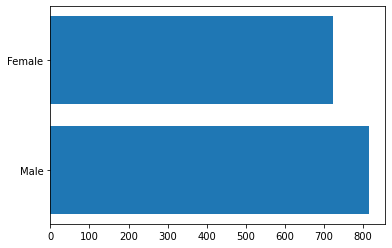

In [7]:
mf = dfF['Total'].mean()
mm = dfM['Total'].mean()
x = ['Male', 'Female']
y = [mm, mf]
plt.barh(x, y)

# Degeree vs Total

<BarContainer object of 3 artists>

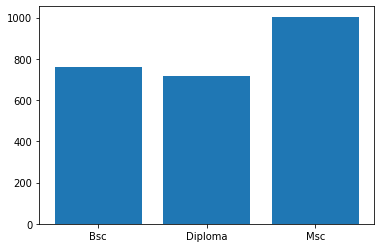

In [8]:
deg = df['Degree'].unique()
dfB = df[df['Degree']=='Bsc']
dfD = df[df['Degree']=='Diploma']
dfM = df[df['Degree']=='Msc']
mb = dfB['Total'].mean()
md = dfD['Total'].mean()
mm = dfM['Total'].mean()
x = deg
y = [mb, md, mm]
plt.bar(x, y)

# Study the relationship between the Degree and the basic salary

<BarContainer object of 3 artists>

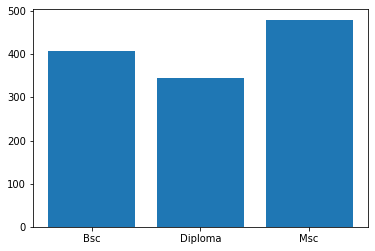

In [9]:
deg = df['Degree'].unique()
dfB = df[df['Degree']=='Bsc']
dfD = df[df['Degree']=='Diploma']
dfM = df[df['Degree']=='Msc']
mb = dfB['Basic'].mean()
md = dfD['Basic'].mean()
mm = dfM['Basic'].mean()
x = deg
y = [mb, md, mm]
plt.bar(x, y)

In [10]:
df.head()

,Gender,Degree,Experience,Marital Status,Dependents,Transportation,Housing,Basic,Allowance,Family,Total
0,F,Bsc,3,Married,3,100,100,400,34,90,724
1,F,Bsc,4,Married,2,110,88,400,44,60,702
2,F,Bsc,5,Married,3,120,100,400,50,90,760
3,F,Bsc,5,Married,0,104,102,400,50,0,656
4,F,Bsc,7,Married,3,105,110,410,70,90,785


In [11]:
df['Gender'] = df['Gender'].replace('F',1 )
df['Gender'] = df['Gender'].replace('M',2 )
x = df['Gender'].unique()
x

array([1, 2])

In [12]:
df['Marital Status'].unique()

array(['Married', 'Single'], dtype=object)

In [13]:
df['Marital Status'] = df['Marital Status'].replace('Married',2 )
df['Marital Status'] = df['Marital Status'].replace('Single',1 )
x = df['Marital Status'].unique()
x

array([2, 1])

In [14]:
df['Degree'].unique()

array(['Bsc', 'Diploma', 'Msc'], dtype=object)

In [15]:
df['Degree'] = df['Degree'].replace('Diploma',1 )
df['Degree'] = df['Degree'].replace('Bsc',2 )
df['Degree'] = df['Degree'].replace('Msc',3 )

In [16]:
df.head()

,Gender,Degree,Experience,Marital Status,Dependents,Transportation,Housing,Basic,Allowance,Family,Total
0,1,2,3,2,3,100,100,400,34,90,724
1,1,2,4,2,2,110,88,400,44,60,702
2,1,2,5,2,3,120,100,400,50,90,760
3,1,2,5,2,0,104,102,400,50,0,656
4,1,2,7,2,3,105,110,410,70,90,785


In [17]:
# ,'Transportation', 'Housing', 'Basic', 'Allowance', 'Family'

X = df[['Gender', 'Degree', 'Experience', 'Marital Status', 'Dependents' ]]
xt = [[1, 2, 2, 1, 0]]
y = df['Total']

In [18]:
from sklearn import linear_model
mod = linear_model.LinearRegression()
mod.fit(X, y)

LinearRegression()

In [19]:
sal = mod.predict(xt)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [20]:
sal

array([654.04538965])

Text(0.5, 1.05, ' Correlation of Features ')

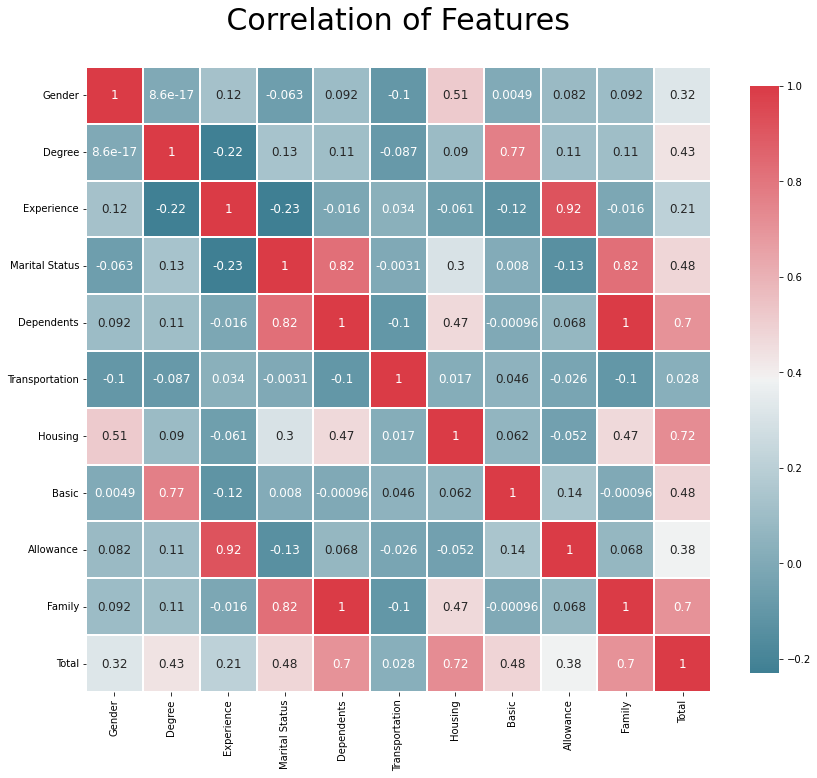

In [21]:
import seaborn as sns
_ , ax = plt.subplots(figsize =(14, 12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
_ = sns.heatmap( df.corr(), cmap = colormap, square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor='white', annot_kws={'fontsize':12 })
    
plt.title(' Correlation of Features ', y=1.05, size=30)

In [22]:
x = df.corr()['Gender']
x

Gender            1.000000e+00
Degree            8.626961e-17
Experience        1.233409e-01
Marital Status   -6.325821e-02
Dependents        9.218668e-02
Transportation   -1.002027e-01
Housing           5.149708e-01
Basic             4.915191e-03
Allowance         8.234907e-02
Family            9.218668e-02
Total             3.223584e-01
Name: Gender, dtype: float64

<AxesSubplot:>

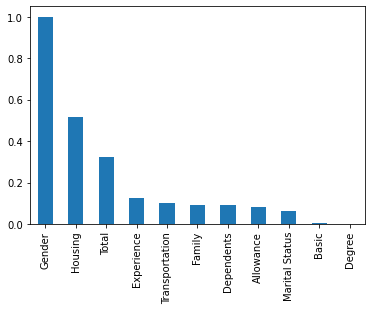

In [23]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')

In [24]:
x=df.corr()['Degree']
x

Gender            8.626961e-17
Degree            1.000000e+00
Experience       -2.235515e-01
Marital Status    1.331932e-01
Dependents        1.058746e-01
Transportation   -8.710252e-02
Housing           9.014587e-02
Basic             7.676728e-01
Allowance         1.067862e-01
Family            1.058746e-01
Total             4.335591e-01
Name: Degree, dtype: float64

<AxesSubplot:>

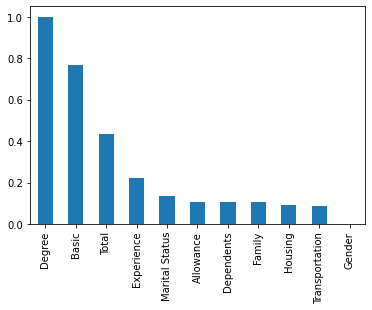

In [25]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')

In [26]:
x = df.corr()['Experience']
x

Gender            0.123341
Degree           -0.223552
Experience        1.000000
Marital Status   -0.230169
Dependents       -0.015823
Transportation    0.034125
Housing          -0.061449
Basic            -0.116857
Allowance         0.916401
Family           -0.015823
Total             0.211229
Name: Experience, dtype: float64

<AxesSubplot:>

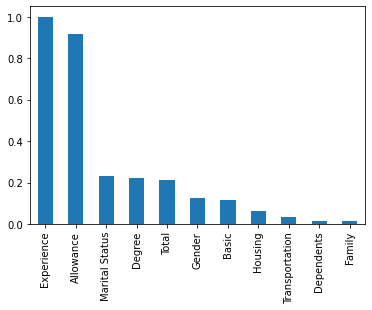

In [27]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')

In [28]:
x=df.corr()['Marital Status']
x

Gender           -0.063258
Degree            0.133193
Experience       -0.230169
Marital Status    1.000000
Dependents        0.820130
Transportation   -0.003053
Housing           0.299115
Basic             0.007990
Allowance        -0.134538
Family            0.820130
Total             0.479665
Name: Marital Status, dtype: float64

<AxesSubplot:>

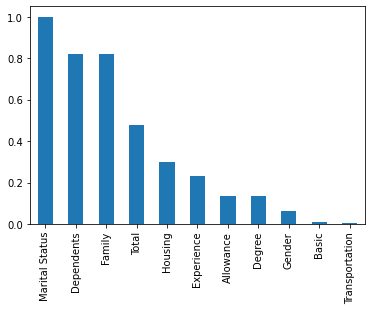

In [29]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')

In [30]:
x=df.corr()['Dependents']
x

Gender            0.092187
Degree            0.105875
Experience       -0.015823
Marital Status    0.820130
Dependents        1.000000
Transportation   -0.100579
Housing           0.470962
Basic            -0.000964
Allowance         0.067909
Family            1.000000
Total             0.702968
Name: Dependents, dtype: float64

<AxesSubplot:>

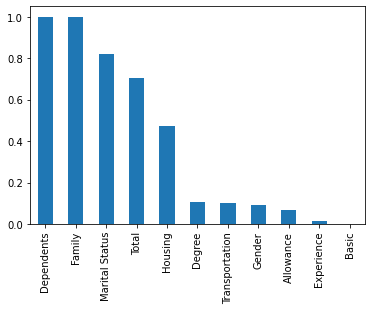

In [31]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')

In [32]:
x =df.corr()['Transportation']
x

Gender           -0.100203
Degree           -0.087103
Experience        0.034125
Marital Status   -0.003053
Dependents       -0.100579
Transportation    1.000000
Housing           0.017187
Basic             0.046203
Allowance        -0.025800
Family           -0.100579
Total             0.028498
Name: Transportation, dtype: float64

<AxesSubplot:>

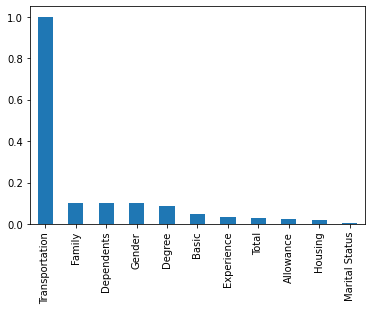

In [33]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')

In [34]:
x=df.corr()['Housing']
x

Gender            0.514971
Degree            0.090146
Experience       -0.061449
Marital Status    0.299115
Dependents        0.470962
Transportation    0.017187
Housing           1.000000
Basic             0.061815
Allowance        -0.051869
Family            0.470962
Total             0.722441
Name: Housing, dtype: float64

<AxesSubplot:>

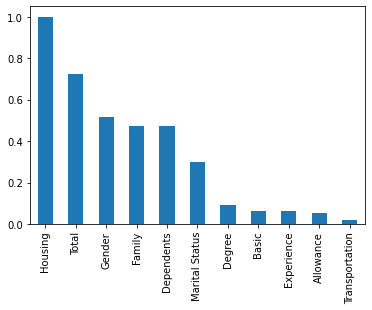

In [35]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')

In [36]:
x=df.corr()['Basic']
x

Gender            0.004915
Degree            0.767673
Experience       -0.116857
Marital Status    0.007990
Dependents       -0.000964
Transportation    0.046203
Housing           0.061815
Basic             1.000000
Allowance         0.144019
Family           -0.000964
Total             0.484596
Name: Basic, dtype: float64

<AxesSubplot:>

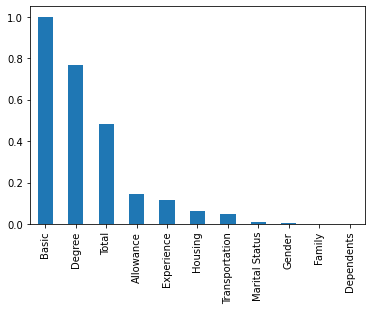

In [37]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')

In [38]:
x=df.corr()['Allowance']
x

Gender            0.082349
Degree            0.106786
Experience        0.916401
Marital Status   -0.134538
Dependents        0.067909
Transportation   -0.025800
Housing          -0.051869
Basic             0.144019
Allowance         1.000000
Family            0.067909
Total             0.383122
Name: Allowance, dtype: float64

<AxesSubplot:>

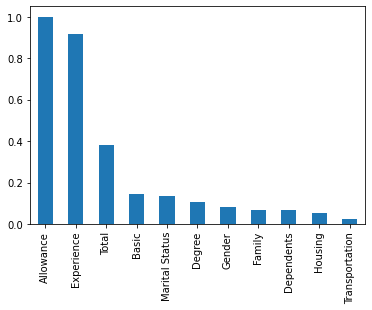

In [39]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')

In [40]:
x=df.corr()['Family']
x

Gender            0.092187
Degree            0.105875
Experience       -0.015823
Marital Status    0.820130
Dependents        1.000000
Transportation   -0.100579
Housing           0.470962
Basic            -0.000964
Allowance         0.067909
Family            1.000000
Total             0.702968
Name: Family, dtype: float64

<AxesSubplot:>

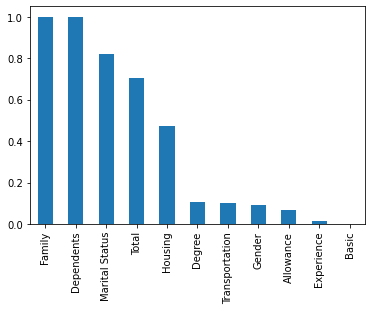

In [41]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')

In [42]:
x =df.corr()['Total']
x

Gender            0.322358
Degree            0.433559
Experience        0.211229
Marital Status    0.479665
Dependents        0.702968
Transportation    0.028498
Housing           0.722441
Basic             0.484596
Allowance         0.383122
Family            0.702968
Total             1.000000
Name: Total, dtype: float64

<AxesSubplot:>

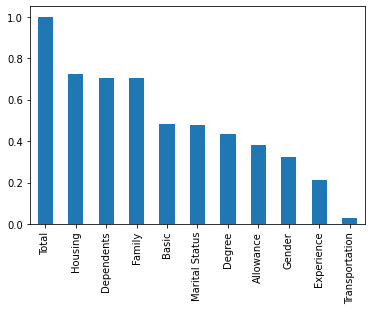

In [43]:
x = abs(x)
x = x.sort_values(ascending=False)
x.plot(kind = 'bar')